In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pyplr.stlabhelp import get_led_colors
from pysilsub.problem import SilentSubstitutionProblem as SSP
from pysilsub.CIE import get_CIES026

In [2]:
# Functions for stimulus waveform
def get_time_vector(duration):
    t = np.arange(0, (duration*1000), 10).astype("int")
    return t


def sinusoid_modulation(f, duration, Fs=50):
    x = np.arange(duration * Fs)
    sm = np.sin(2 * np.pi * f * x / Fs)
    return sm


def modulate_intensity_amplitude(sm, background, amplitude):
    ivals = (background + (sm*amplitude)).astype("int")
    return ivals

************************************************************
*************** Silent Substitution Problem ****************
************************************************************
Device: STLAB_1
Background: [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
Ignoring: ['R']
Silencing: ['M', 'L', 'I']
Isolating: ['S']
Target contrast: 2.0
Bounds:
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)
(0.0, 1.0)


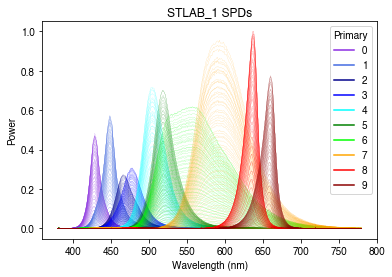

In [3]:
# Load the calibration data
spds = (pd.read_csv(
    '../data/STLAB_Bin/data2/STLAB_1_jaz_visible.csv', 
    index_col=['Primary', 'Setting'])
        .sort_index())
spds = spds.div(spds.max(axis=0).max())
spds.columns = spds.columns.astype('int')

ssp = SSP(
    resolutions=[4095]*10,  # 10 12-bit primaries 
    colors=get_led_colors(),  # Colors of the LEDs
    spds=spds,  # The calibration data
    wavelengths=[380, 781, 1],  # SPD wavelength binwidth
    ignore=['R'],  # Ignore rods
    silence=['M', 'L', 'I'],  # Silence S-, M-, and L-cones
    isolate=['S'],  # Isolate melanopsin
    target_contrast=2.,  # Aim for 250% contrast 
    name='STLAB_1', # Description of device
    background=[.5]*10  
) 

spd_fig = ssp.plot_spds(norm=False)


# Target waveform

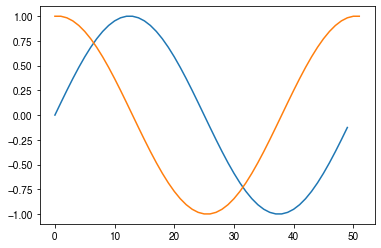

In [4]:
# Target contrast vals for modulation
contrast_waveform = sinusoid_modulation(f=1, duration=1, Fs=50)
plt.plot(contrast_waveform)
peak = np.argmax(contrast_waveform)
trough = np.argmin(contrast_waveform)
target_contrasts = contrast_waveform[peak:trough+1]
plt.plot(np.hstack([target_contrasts, target_contrasts[::-1]]))

S-cone contrast modulation
==========================

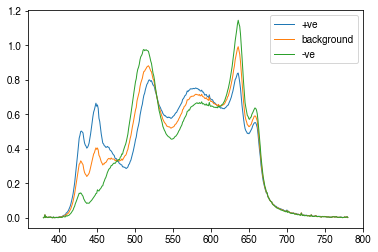

In [5]:
# Calcualte modulation spectra for S-cone modulation
target_contrast = 3.5
contrast_mods = [ssp.linalg_solve([tc, 0, 0, 0]) for tc in target_contrasts*target_contrast]

plt.plot(ssp.predict_multiprimary_spd(contrast_mods[0]), lw=1, label='+ve')
plt.plot(ssp.predict_multiprimary_spd(ssp.background), lw=1, label='background')
plt.plot(ssp.predict_multiprimary_spd(contrast_mods[-1]), lw=1, label='-ve')
plt.legend()


Contrast modulations
--------------------

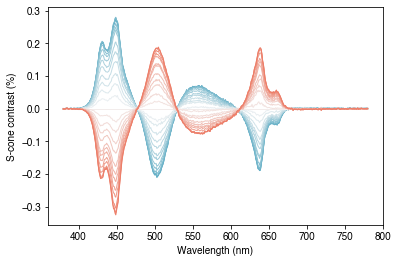

In [260]:
palette = sns.diverging_palette(220, 20, n=len(contrast_mods), l=65, as_cmap=False)
bg_spd = ssp.predict_multiprimary_spd(ssp.background)
for i, s in enumerate(contrast_mods):
    mod_spd = ssp.predict_multiprimary_spd(s) 
    plt.plot(mod_spd-bg_spd, c=palette[i], lw=1)
    
plt.xlabel('Wavelength (nm)')
plt.ylabel('S-cone contrast (%)');

Splatter
--------

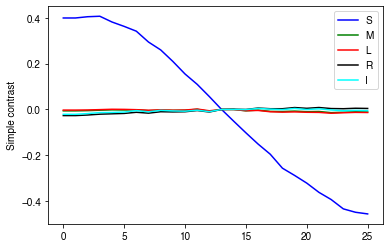

In [261]:
splatter = [ssp.get_photoreceptor_contrasts(cm) for cm in contrast_mods]
splatter = np.vstack(splatter)

plt.plot(splatter[:,0], label='S', c='b')
plt.plot(splatter[:,1], label='M', c='g')
plt.plot(splatter[:,2], label='L', c='r')
plt.plot(splatter[:,3], label='R', c='k')
plt.plot(splatter[:,4], label='I', c='cyan')
plt.ylabel('Simple contrast')
plt.legend()

Melanopsin modulation
---------------------

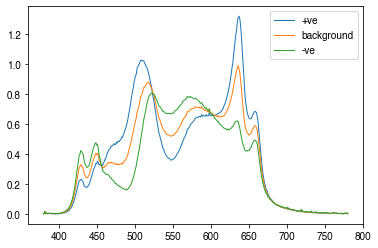

In [266]:
ssp.isolate = ['I']
ssp.silence = ['S', 'M', 'L']

target_contrast = 4

contrast_mods = [ssp.linalg_solve([0, 0, 0, tc]) for tc in target_contrasts*target_contrast]
plt.plot(ssp.predict_multiprimary_spd(contrast_mods[0]), lw=1, label='+ve')
plt.plot(ssp.predict_multiprimary_spd(ssp.background), lw=1, label='background')
plt.plot(ssp.predict_multiprimary_spd(contrast_mods[-1]), lw=1, label='-ve')
plt.legend()

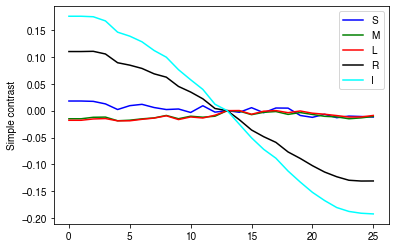

In [264]:
splatter = [ssp.get_photoreceptor_contrasts(cm) for cm in contrast_mods]
splatter = np.vstack(splatter)

plt.plot(splatter[:,0], label='S', c='b')
plt.plot(splatter[:,1], label='M', c='g')
plt.plot(splatter[:,2], label='L', c='r')
plt.plot(splatter[:,3], label='R', c='k')
plt.plot(splatter[:,4], label='I', c='cyan')
plt.ylabel('Simple contrast')
plt.legend()

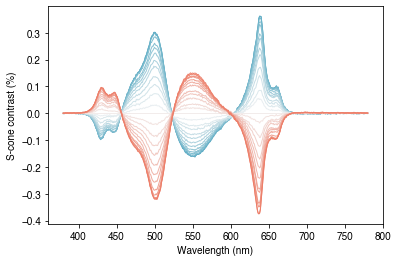

In [267]:
palette = sns.diverging_palette(220, 20, n=len(contrast_mods), l=65, as_cmap=False)
bg_spd = ssp.predict_multiprimary_spd(ssp.background)
for i, s in enumerate(contrast_mods):
    mod_spd = ssp.predict_multiprimary_spd(s) 
    plt.plot(mod_spd-bg_spd, c=palette[i], lw=1)
    
plt.xlabel('Wavelength (nm)')
plt.ylabel('S-cone contrast (%)');

M-cone
------

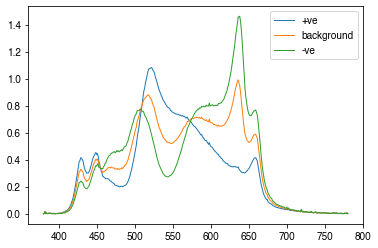

In [273]:
ssp.isolate = ['M']
ssp.silence = ['S', 'L', 'I']

target_contrast = 3.4

contrast_mods = [ssp.linalg_solve([0, tc, 0, 0]) for tc in target_contrasts*target_contrast]
plt.plot(ssp.predict_multiprimary_spd(contrast_mods[0]), lw=1, label='+ve')
plt.plot(ssp.predict_multiprimary_spd(ssp.background), lw=1, label='background')
plt.plot(ssp.predict_multiprimary_spd(contrast_mods[-1]), lw=1, label='-ve')
plt.legend()

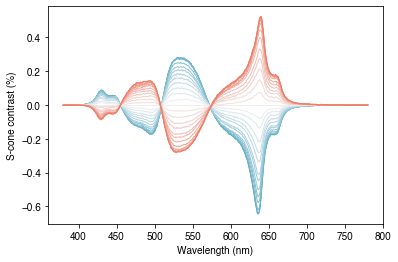

In [274]:
palette = sns.diverging_palette(220, 20, n=len(contrast_mods), l=65, as_cmap=False)
bg_spd = ssp.predict_multiprimary_spd(ssp.background)
for i, s in enumerate(contrast_mods):
    mod_spd = ssp.predict_multiprimary_spd(s) 
    plt.plot(mod_spd-bg_spd, c=palette[i], lw=1)
    
plt.xlabel('Wavelength (nm)')
plt.ylabel('S-cone contrast (%)');

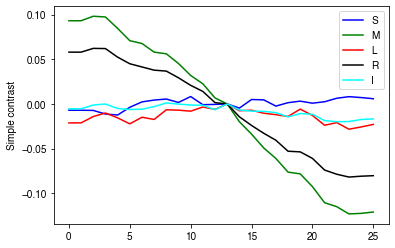

In [275]:
splatter = [ssp.get_photoreceptor_contrasts(cm) for cm in contrast_mods]
splatter = np.vstack(splatter)

plt.plot(splatter[:,0], label='S', c='b')
plt.plot(splatter[:,1], label='M', c='g')
plt.plot(splatter[:,2], label='L', c='r')
plt.plot(splatter[:,3], label='R', c='k')
plt.plot(splatter[:,4], label='I', c='cyan')
plt.ylabel('Simple contrast')
plt.legend()

L-cone
------

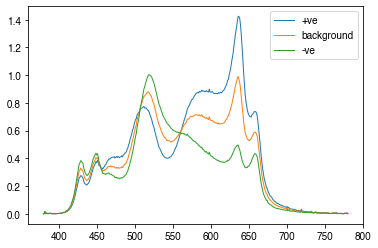

In [276]:
ssp.isolate = ['L']
ssp.silence = ['S', 'M', 'I']

target_contrast = 4

contrast_mods = [ssp.linalg_solve([0, 0, tc, 0]) for tc in target_contrasts*target_contrast]
plt.plot(ssp.predict_multiprimary_spd(contrast_mods[0]), lw=1, label='+ve')
plt.plot(ssp.predict_multiprimary_spd(ssp.background), lw=1, label='background')
plt.plot(ssp.predict_multiprimary_spd(contrast_mods[-1]), lw=1, label='-ve')
plt.legend()

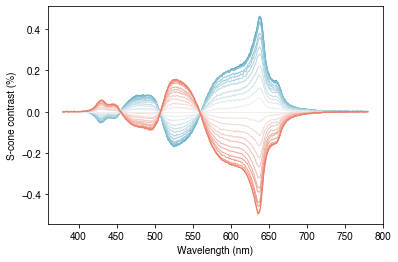

In [277]:
palette = sns.diverging_palette(220, 20, n=len(contrast_mods), l=65, as_cmap=False)
bg_spd = ssp.predict_multiprimary_spd(ssp.background)
for i, s in enumerate(contrast_mods):
    mod_spd = ssp.predict_multiprimary_spd(s) 
    plt.plot(mod_spd-bg_spd, c=palette[i], lw=1)
    
plt.xlabel('Wavelength (nm)')
plt.ylabel('S-cone contrast (%)');

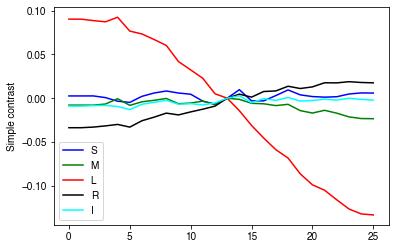

In [278]:
splatter = [ssp.get_photoreceptor_contrasts(cm) for cm in contrast_mods]
splatter = np.vstack(splatter)

plt.plot(splatter[:,0], label='S', c='b')
plt.plot(splatter[:,1], label='M', c='g')
plt.plot(splatter[:,2], label='L', c='r')
plt.plot(splatter[:,3], label='R', c='k')
plt.plot(splatter[:,4], label='I', c='cyan')
plt.ylabel('Simple contrast')
plt.legend()